In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv("../dataset/data_2c40d1w.csv") # 1 window dataset
df.head()

,mu1,mu2,mu3,mu4,mu5,mu6,mu7,mu8,mu9,mu10,...,grad2,grad3,grad4,grad5,grad6,grad7,grad8,grad9,grad10,label
0,278.774707,43.989714,0.076024,232.573832,72.837648,57.169208,4.608077,519.730558,479.891748,473.606706,...,1.4375,0.1250,63.8125,27.0625,18.5000,0.4375,107.3750,56.1875,105.3125,A
1,224.539341,21.197600,-0.304591,197.780018,40.784902,33.671422,1.698228,537.708162,358.129115,370.972376,...,0.6250,0.0625,38.5000,11.1875,8.3750,0.2500,63.8125,29.3125,65.5625,A
2,247.567444,29.502649,2.993779,195.053407,56.158554,46.556542,4.758265,513.272434,368.087757,409.851579,...,0.8125,0.1250,41.1250,13.5625,10.1250,0.2500,68.3750,32.1875,71.8750,A
3,323.451393,76.388148,3.697569,294.359733,105.376635,76.852377,9.373920,615.302400,538.694226,545.551134,...,2.3750,0.1875,84.0625,41.6250,27.1875,0.6250,143.3125,71.0000,126.1250,A
4,253.456823,29.082664,3.628899,216.474224,57.839752,51.096883,3.429937,527.428324,386.860704,439.718273,...,0.8125,0.1875,41.5000,12.5625,9.6875,0.3125,66.5000,31.9375,72.2500,A


In [17]:
X = df.drop(columns="label")
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 40), (14, 40), (56,), (14,))

In [25]:
LOOCV = LeaveOneOut()

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), list(X.columns)),
])

pipeline_svm_linear = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="linear", probability=True, random_state=42))
])

pipeline_svm_rbf = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel="rbf",probability=True, random_state=42))
])

svm_params = {'algo__gamma': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
              'algo__C': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [26]:
model_svm_linear = GridSearchCV(pipeline_svm_linear, svm_params, cv=LOOCV, n_jobs=-1);
model_svm_rbf = GridSearchCV(pipeline_svm_rbf, svm_params, cv=LOOCV, n_jobs=-1);

model_svm_linear.fit(X_train, y_train);
model_svm_rbf.fit(X_train, y_train);

# Linear SVM Model Evaluation

In [27]:
print(model_svm_linear.best_params_)
print(model_svm_linear.score(X_train, y_train), model_svm_linear.best_score_, model_svm_linear.score(X_test, y_test))

{'algo__C': 10.0, 'algo__gamma': 0.001}
0.9285714285714286 0.75 0.7142857142857143


In [28]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear, report=True)

Train report
              precision    recall  f1-score   support

           A       0.90      0.96      0.93        28
           B       0.96      0.89      0.93        28

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56


Test report
              precision    recall  f1-score   support

           A       0.71      0.71      0.71         7
           B       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



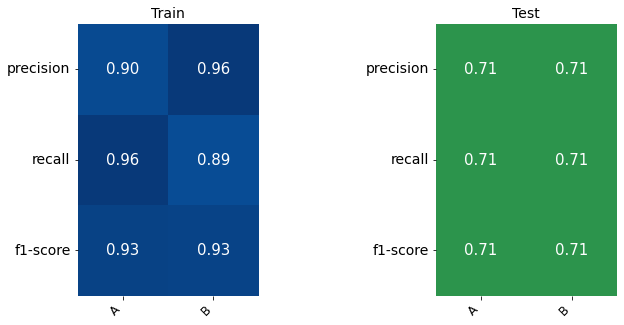

In [29]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_linear)

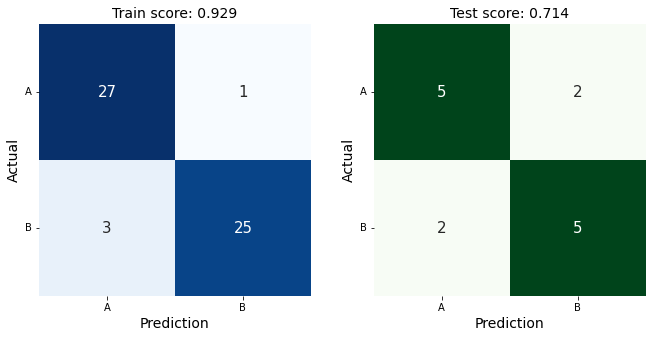

In [30]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_linear)

# RBF SVM Model Evaluation

In [31]:
print(model_svm_rbf.best_params_)
print(model_svm_rbf.score(X_train, y_train), model_svm_rbf.best_score_, model_svm_rbf.score(X_test, y_test))

{'algo__C': 10.0, 'algo__gamma': 0.1}
0.9107142857142857 0.7678571428571429 0.7857142857142857


In [32]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf, report=True)

Train report
              precision    recall  f1-score   support

           A       0.93      0.89      0.91        28
           B       0.90      0.93      0.91        28

    accuracy                           0.91        56
   macro avg       0.91      0.91      0.91        56
weighted avg       0.91      0.91      0.91        56


Test report
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       0.83      0.71      0.77         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14



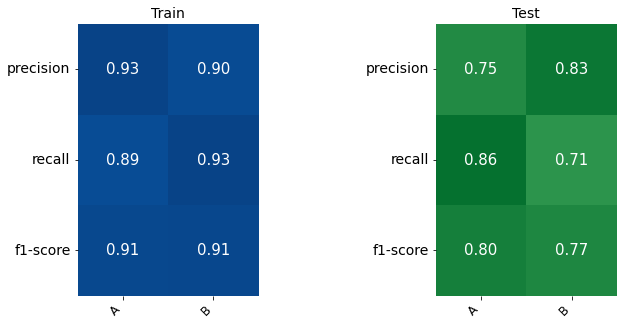

In [33]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svm_rbf)

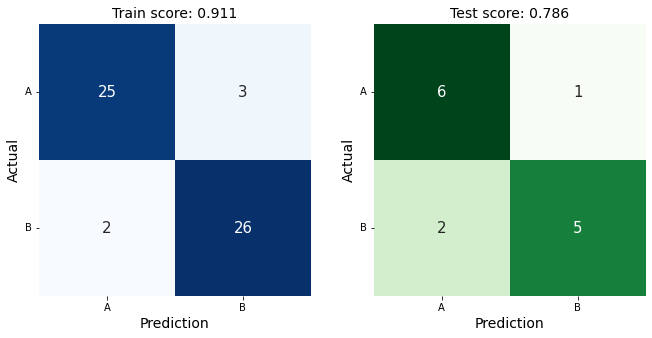

In [34]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svm_rbf)

# Save Model

In [35]:
import pickle
import os
file_path = "../model"
os.makedirs(file_path, exist_ok=True)
pickle.dump(model_svm_linear, open(f"{file_path}/svm_linear_1w.pkl", "wb"))
pickle.dump(model_svm_rbf, open(f"{file_path}/svm_rbf_1w.pkl", "wb"))